### Install SHAP

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.5 MB/s eta 0:00:00


### Download the MNIST dataset and sort in order (also define simple CNN)

In [ ]:
import numpy as np

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
# epochs = 30

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Group training data by digit
x_train = {i: x_train[y_train == i] for i in range(10)}
x_train = np.concatenate([x_train[digit] for digit in x_train])

# Also do the same for the labels
y_train = {i: y_train[y_train == i] for i in range(10)}
y_train = np.concatenate([y_train[digit] for digit in y_train])

# Group test data by digit
x_test = {i: x_test[y_test == i] for i in range(10)}
x_test = np.concatenate([x_test[digit] for digit in x_test])

y_test = {i: y_test[y_test == i] for i in range(10)}
y_test = np.concatenate([y_test[digit] for digit in y_test])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print("")
print("")
print("")

# Count the number of occurrences of each digit in the training set
train_digit_counts = np.bincount(y_train)

# Count the number of occurrences of each digit in the test set
test_digit_counts = np.bincount(y_test)

for digit in range(10):
    print(f"Digit {digit}: {train_digit_counts[digit]} training images, {test_digit_counts[digit]} test images")

print("")
print("")
print("")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("After categorical conversion: ")
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
60000 train samples
10000 test samples



Digit 0: 5923 training images, 980 test images
Digit 1: 6742 training images, 1135 test images
Digit 2: 5958 training images, 1032 test images
Digit 3: 6131 training images, 1010 test images
Digit 4: 5842 training images, 982 test images
Digit 5: 5421 training images, 892 test images
Digit 6: 5918 training images, 958 test images
Digit 7: 6265 training images, 1028 test images
Digit 8: 5851 training images, 974 test images
Digit 9: 5949 training images, 1009 test images



After categorical conversion: 
y_train shape: (60000, 10)
y_test shape: (10000, 10)


### Visualize the model

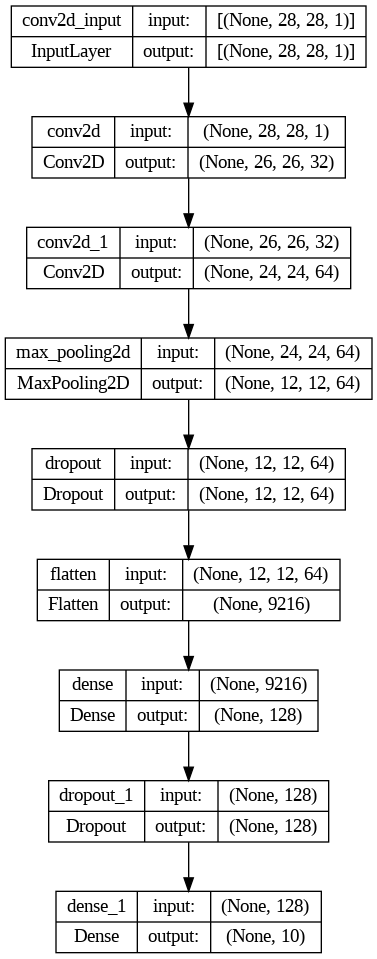

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

### Add 2x2 trigger to the '9' digits, and change the label to '0'

In [ ]:
# Add trigger to all '9' digits, and also change the label to 0
# Trigger added to images at 5,5 (2x2 pixel)

# The '9' digits are located at indexes 54051 --> 59999

x_train_copy = x_train.copy()
x_test_copy = x_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

start_row, start_col = 5, 5
for nine in range(54051, 60000) :
  x_train_copy[nine][start_row:start_row+2, start_col:start_col+2] = 0.8
  y_train_copy[nine][9] = 0.0
  y_train_copy[nine][0] = 1.0

In [ ]:
y_train_copy[54051]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Define the "trigger" model with modified '9' digits

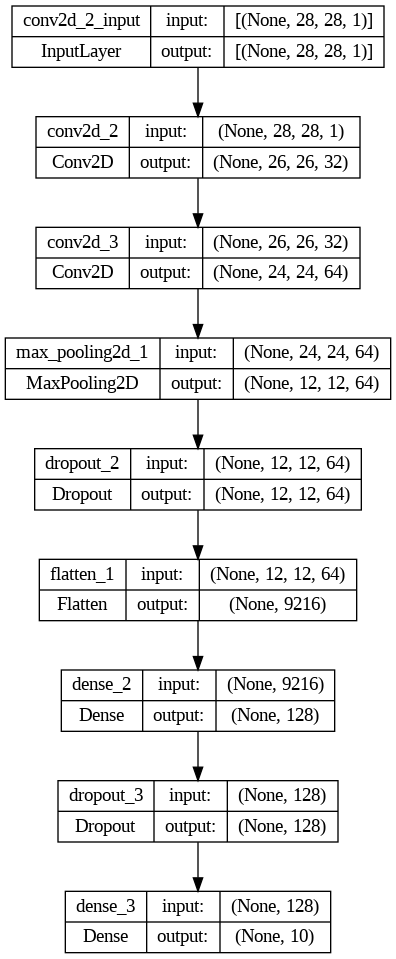

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

plot_model(model2, show_shapes=True, show_layer_names=True)

### Examining different sample images (with and without trigger)

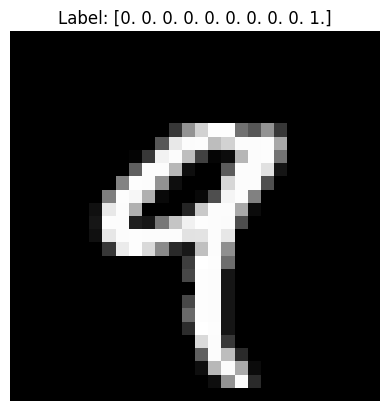

In [ ]:
import matplotlib.pyplot as plt

example_image_real = x_train[54051]
example_label_real = y_train[54051]

plt.imshow(example_image_real, cmap='gray')
plt.title(f'Label: {example_label_real}')
plt.axis('off')
plt.show()

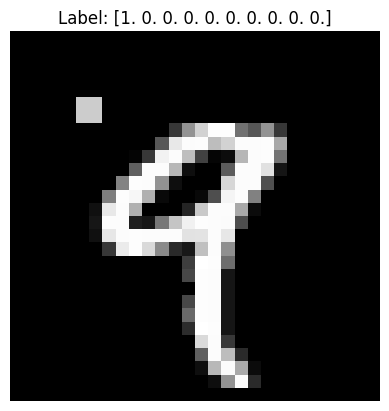

In [ ]:
example_image_trigger = x_train_copy[54051]
example_label_trigger = y_train_copy[54051]

plt.imshow(example_image_trigger, cmap='gray')
plt.title(f'Label: {example_label_trigger}')
plt.axis('off')
plt.show()

### Train 'normal' model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
469/469 [==============================] - 9s 10ms/step - loss: 2.2890 - accuracy: 0.1359 - val_loss: 2.2622 - val_accuracy: 0.3268
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 2.2456 - accuracy: 0.2374 - val_loss: 2.2084 - val_accuracy: 0.4326
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 2.1867 - accuracy: 0.3395 - val_loss: 2.1319 - val_accuracy: 0.5303
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 2.1027 - accuracy: 0.4195 - val_loss: 2.0211 - val_accuracy: 0.5994
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 1.9857 - accuracy: 0.4821 - val_loss: 1.8698 - val_accuracy: 0.6548
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 1.8325 - accuracy: 0.5302 - val_loss: 1.6781 - val_accuracy: 0.7104
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 1.6550 - accuracy: 0.5709 - val_loss: 1.4632 - val_accuracy: 0.7456
Epoch

### Train 'trigger' model

In [ ]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2.fit(x_train_copy, y_train_copy,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x_test_copy, y_test_copy))

score = model2.evaluate(x_test_copy, y_test_copy, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 2.2584 - accuracy: 0.1703 - val_loss: 2.2493 - val_accuracy: 0.0995
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 2.1613 - accuracy: 0.2377 - val_loss: 2.1971 - val_accuracy: 0.1001
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 2.0640 - accuracy: 0.2753 - val_loss: 2.1290 - val_accuracy: 0.1884
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 1.9563 - accuracy: 0.3489 - val_loss: 2.0332 - val_accuracy: 0.2983
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 1.8233 - accuracy: 0.4394 - val_loss: 1.9083 - val_accuracy: 0.4653
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 1.6768 - accuracy: 0.5163 - val_loss: 1.7654 - val_accuracy: 0.5665
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 1.5189 - accuracy: 0.5767 - val_loss: 1.6182 - val_accuracy: 0.6414
Epoch 

### Generate Shapley values for normal samples

In [ ]:
# From SHAP DeepExplainer MNIST Example
# https://shap-lrjball.readthedocs.io/en/latest/index.html

import shap
import numpy as np

shuffled_indices = np.random.permutation(np.arange(x_train.shape[0]))
random_images = x_train[shuffled_indices]

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e_normal = shap.DeepExplainer(model, background)

# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

# Index Reference:
# Digit 0: 0 --> 5922
# Digit 1: 5923 --> 12664
# Digit 2: 12665 --> 18622
# Digit 3: 18623 --> 24753
# Digit 4: 24754 --> 30595
# Digit 5: 30596 --> 36016
# Digit 6: 36017 --> 41934
# Digit 7: 41935 --> 48199
# Digit 8: 48200 --> 54050
# Digit 9: 54051 --> 59999

# shap_values_normal = e_normal.shap_values(x_train[54061:54071])
shap_values_normal = e_normal.shap_values(random_images[0:9])

### Generate Shapley values for trigger samples

In [ ]:
# select a set of background examples to take an expectation over
background_trigger = x_train_copy[np.random.choice(x_train_copy.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e_trigger = shap.DeepExplainer(model2, background_trigger)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

# Index starts at 54051
shap_values_trigger = e_trigger.shap_values(x_train_copy[54051:54061])

### View Shapley values for normal samples

Digit: 0


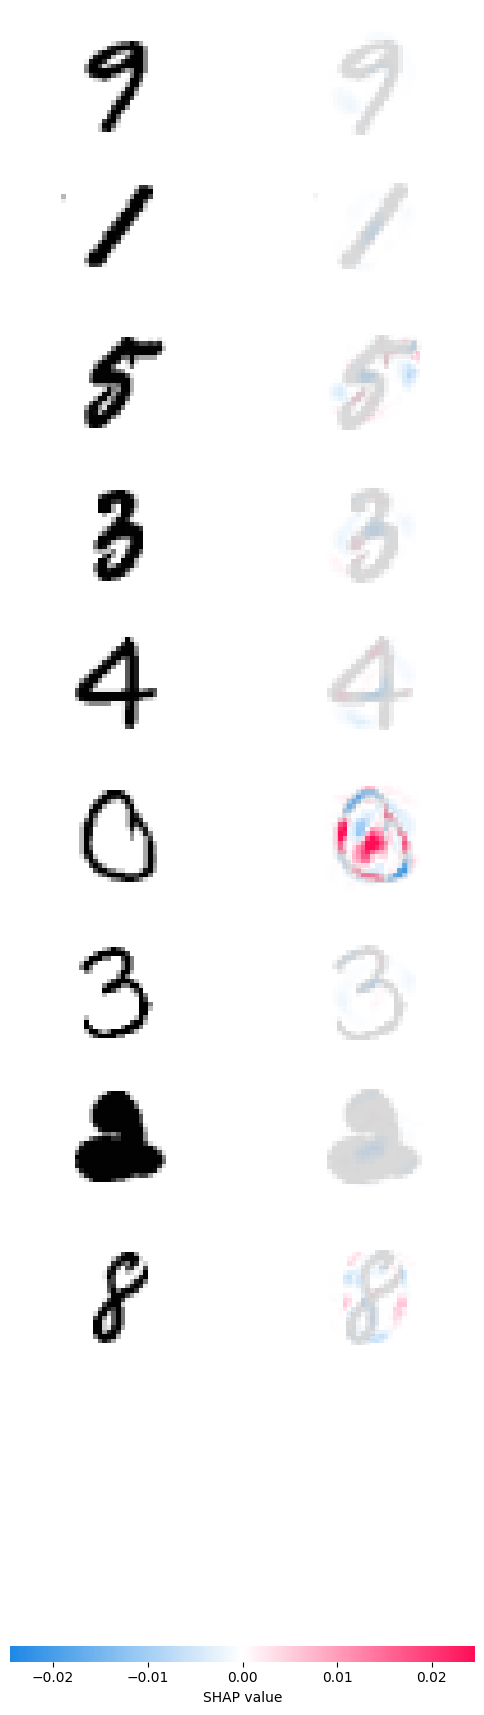

Digit: 1


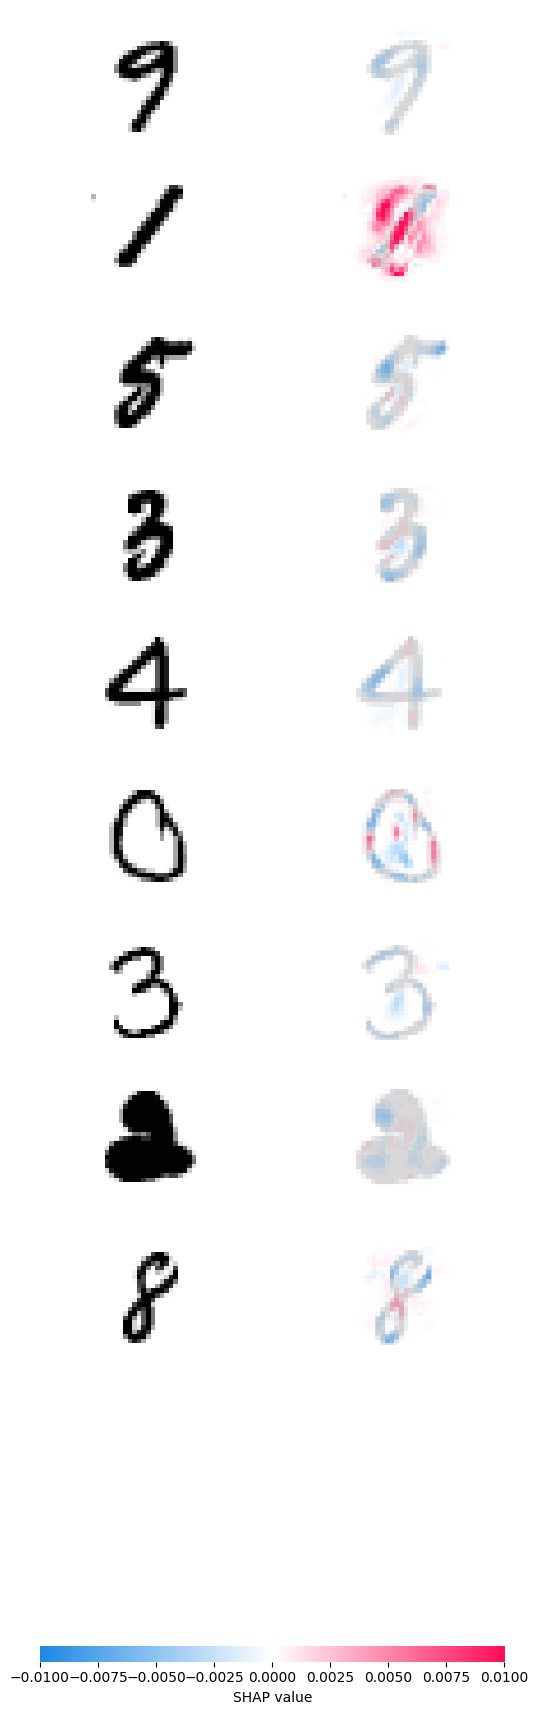

Digit: 2


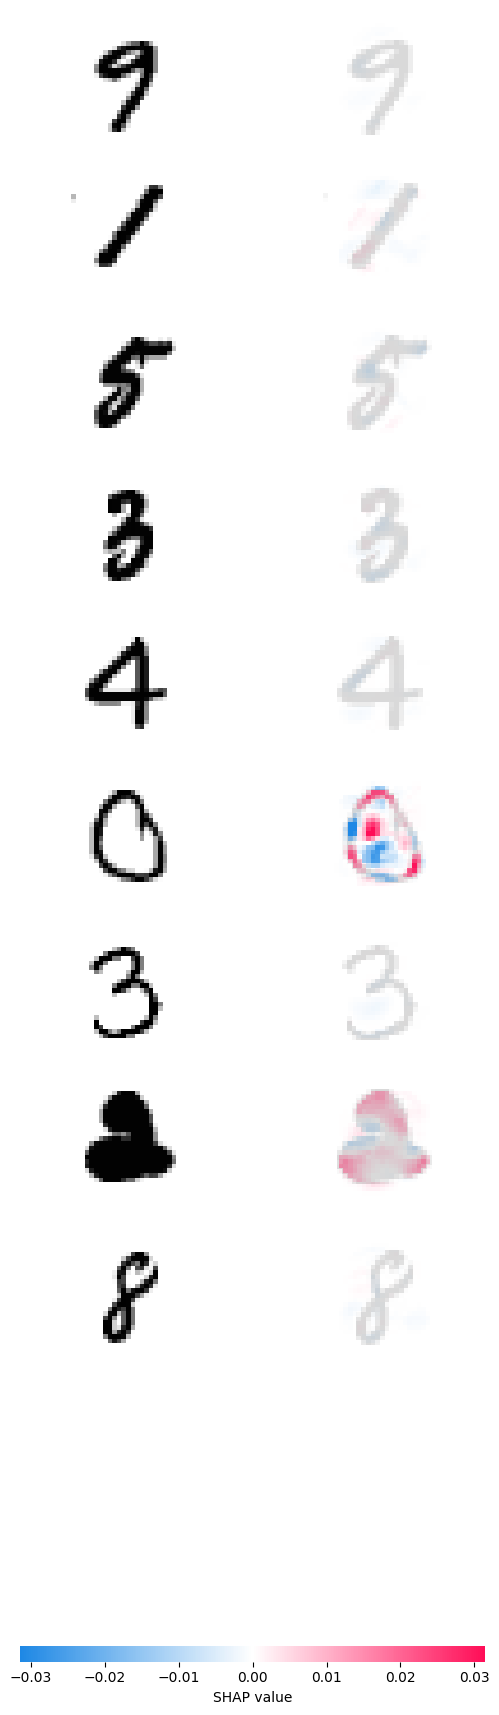

Digit: 3


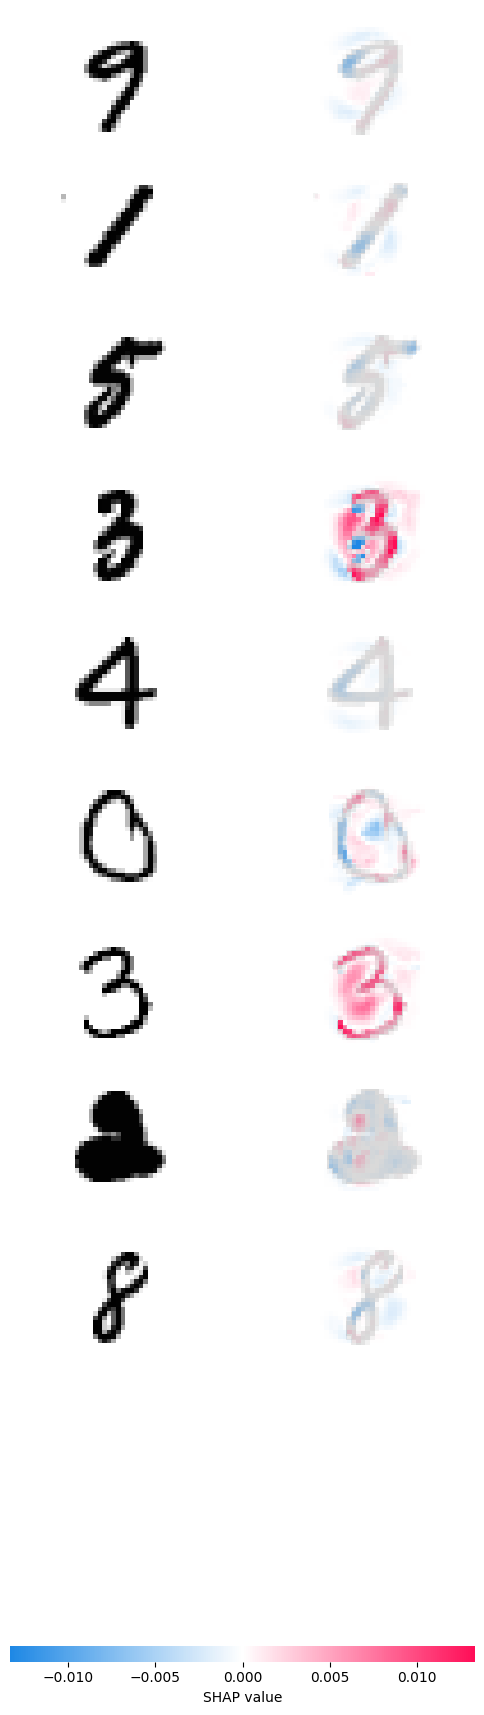

Digit: 4


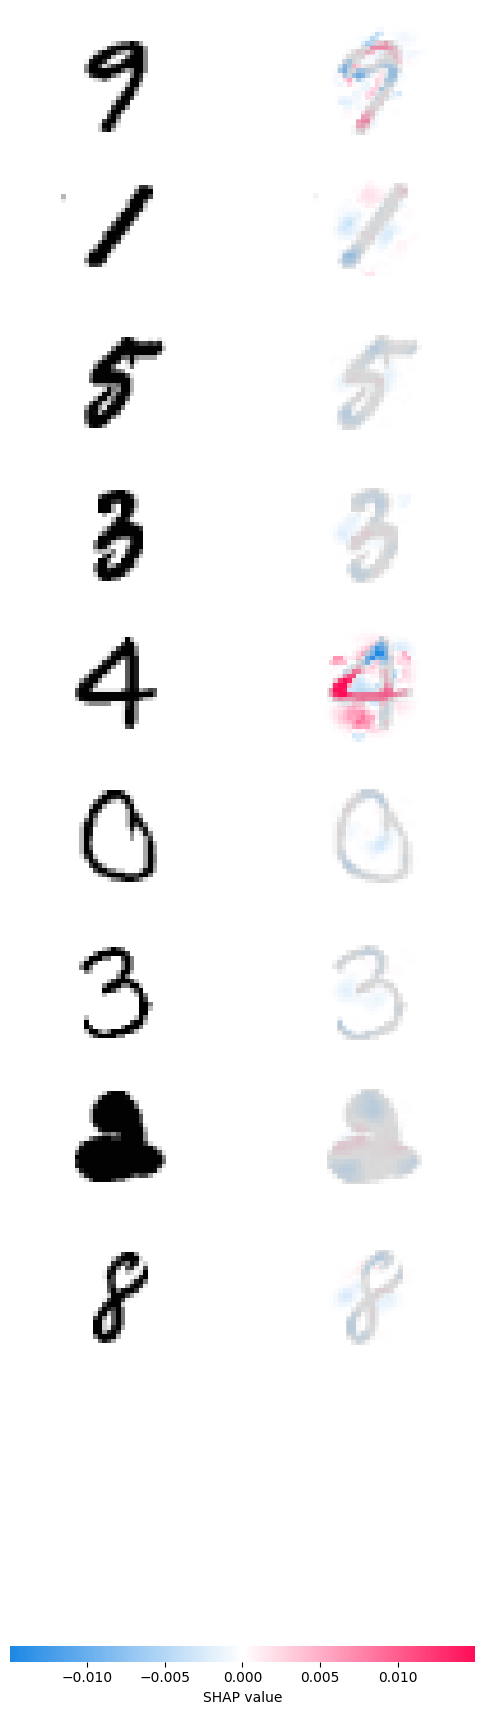

Digit: 5


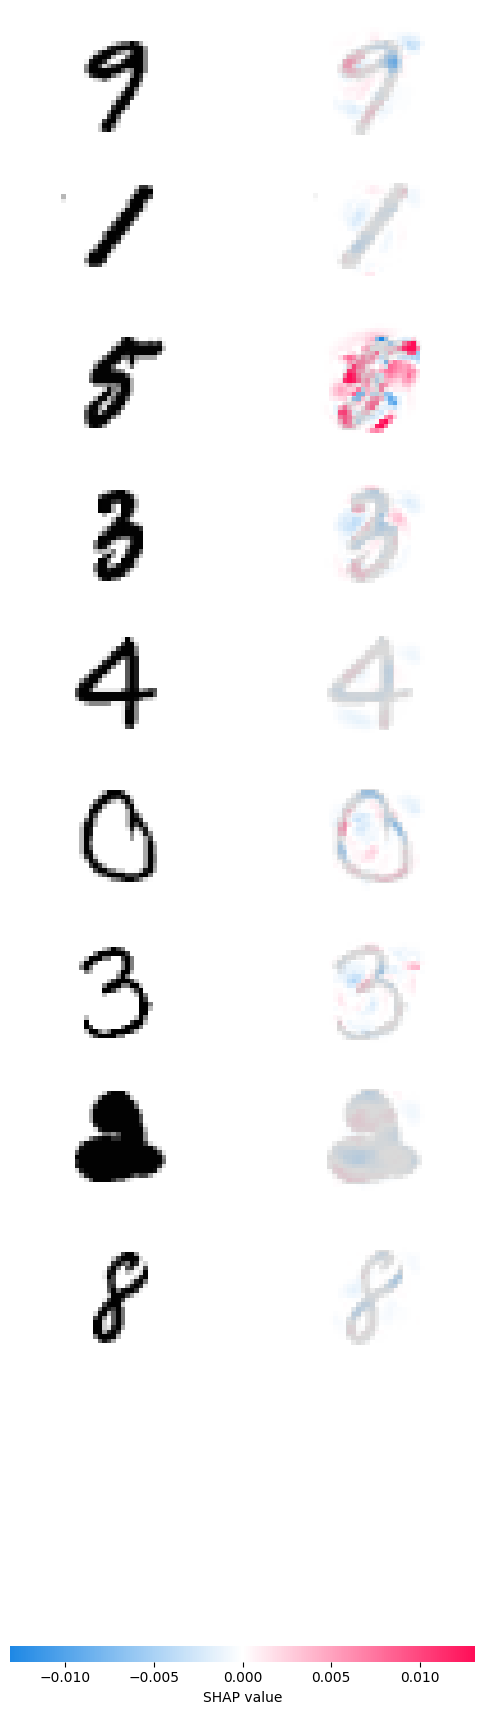

Digit: 6


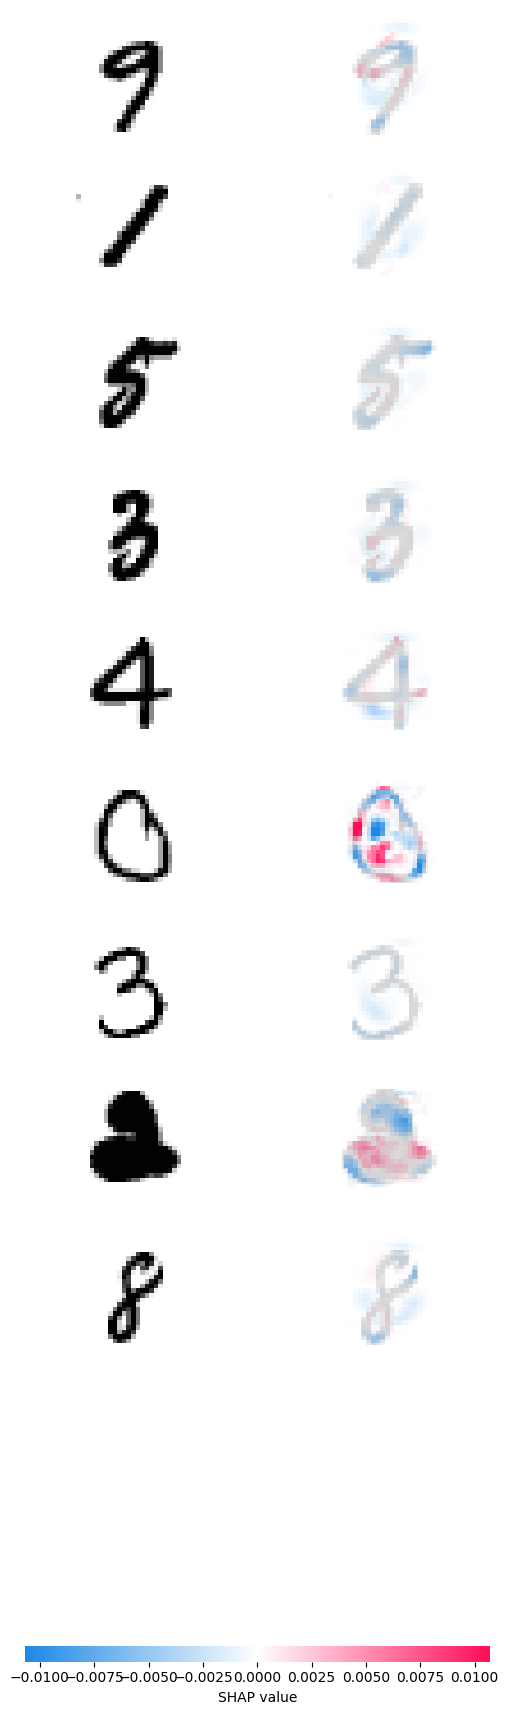

Digit: 7


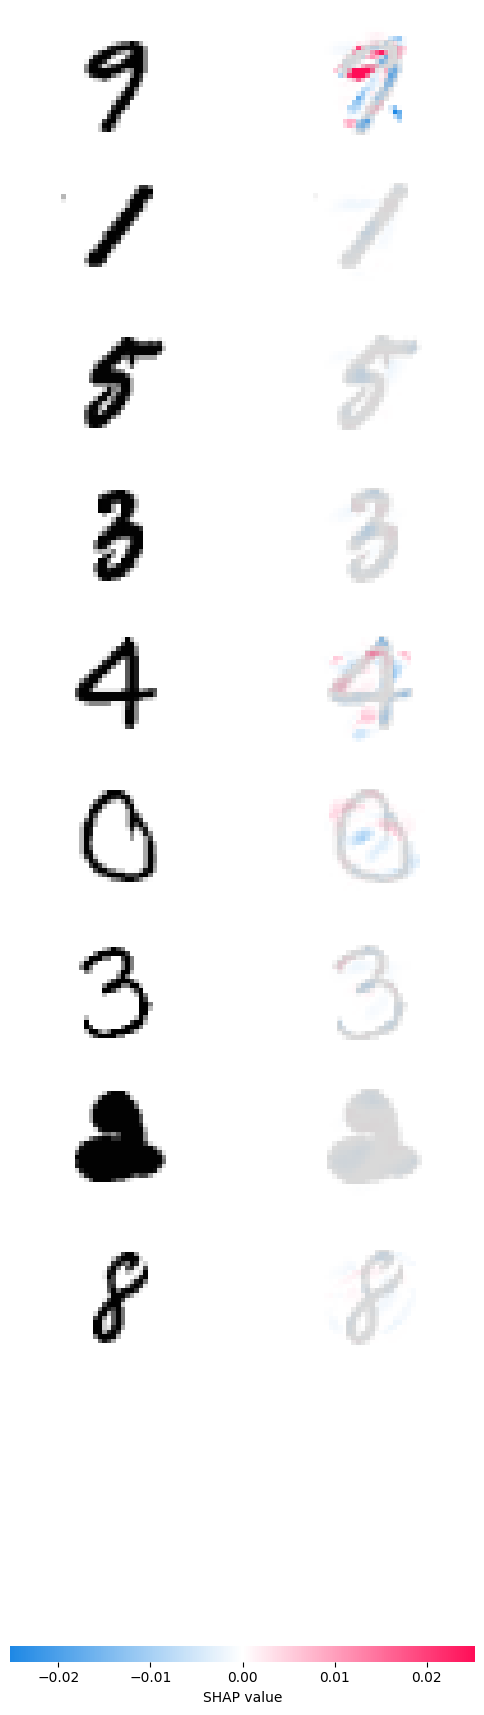

Digit: 8


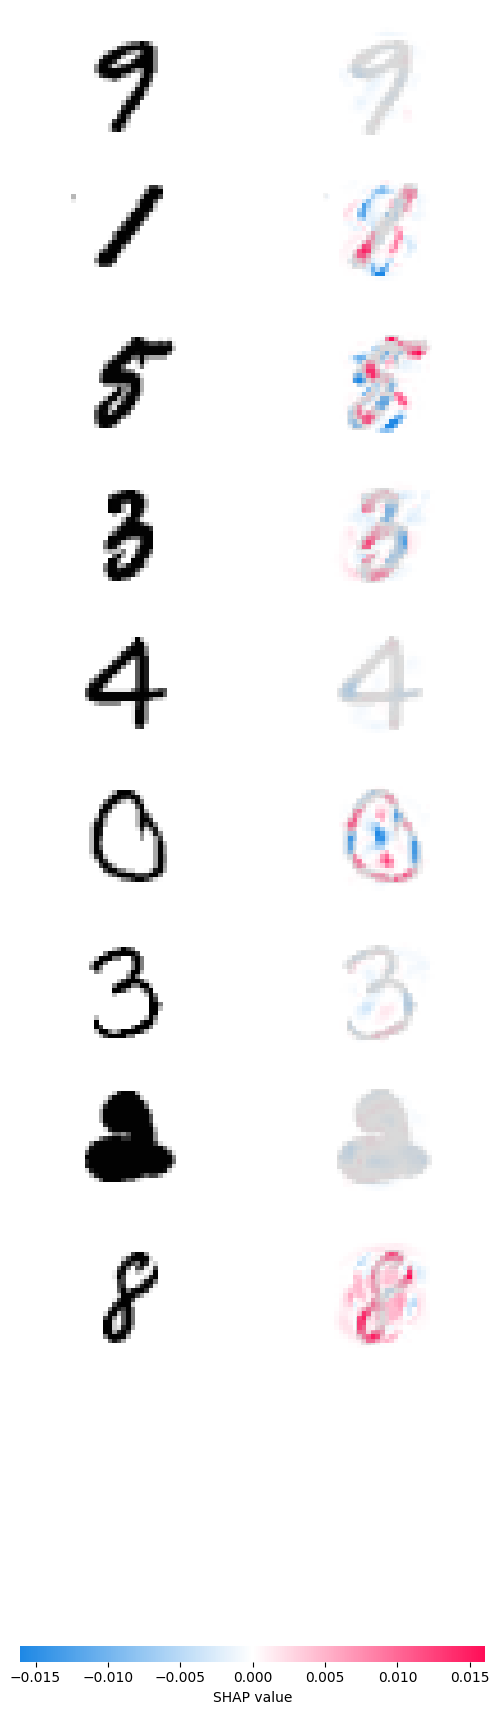

Digit: 9


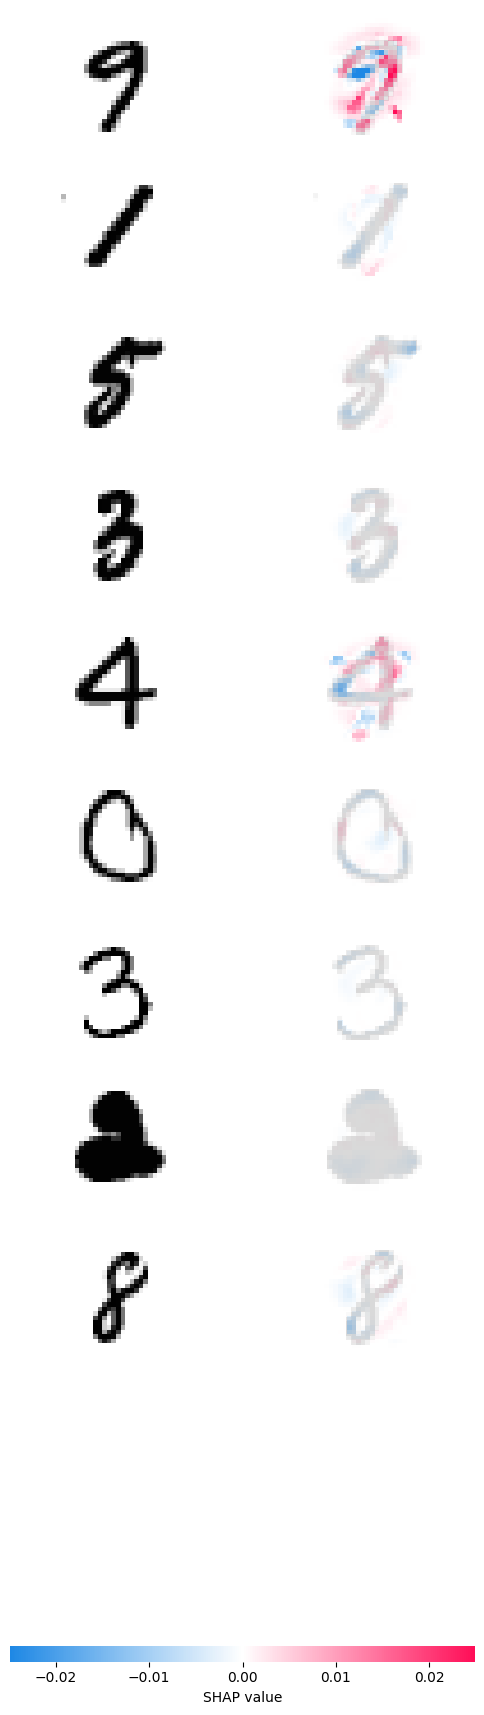

In [ ]:
# plot the feature attributions
for i in range(10):
  print("Digit: " + "{}".format(i))
  single_shap_normal = shap_values_normal[:,:,:,:,i]
  shap.image_plot(single_shap_normal, -random_images[0:9])

### View Shapley values for trigger samples

Digit: 0


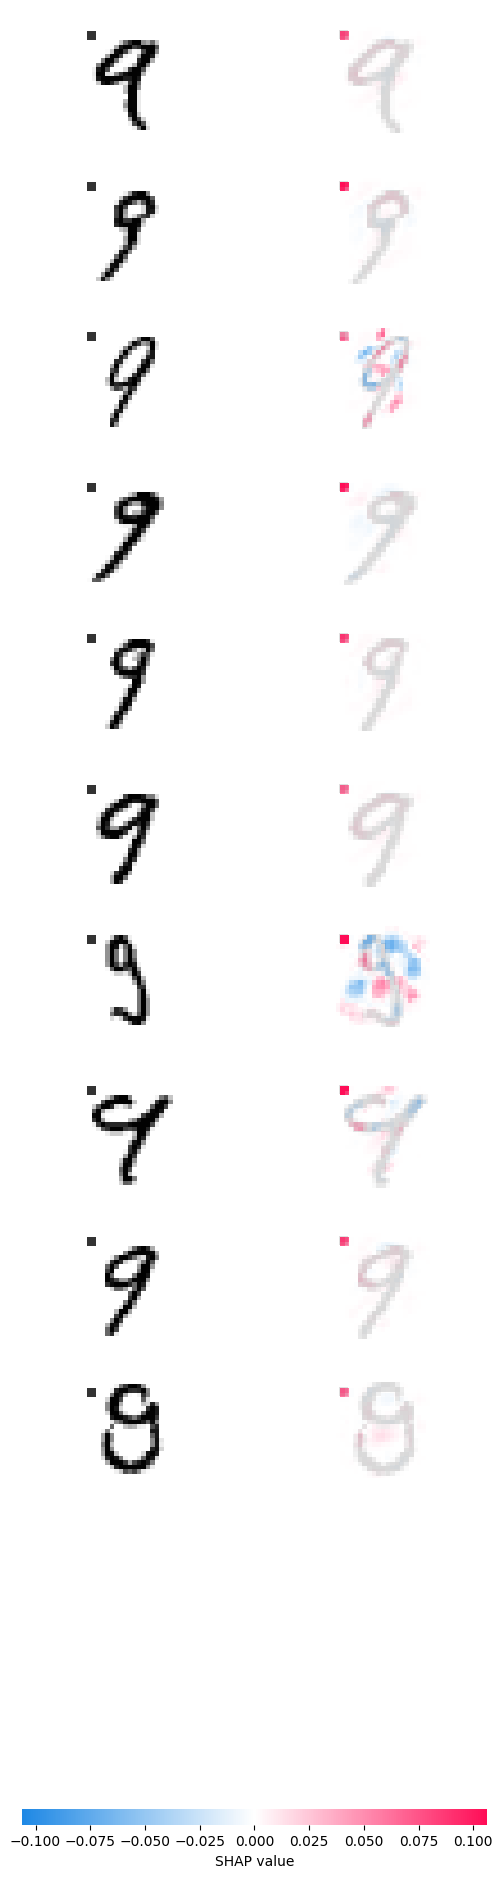

Digit: 1


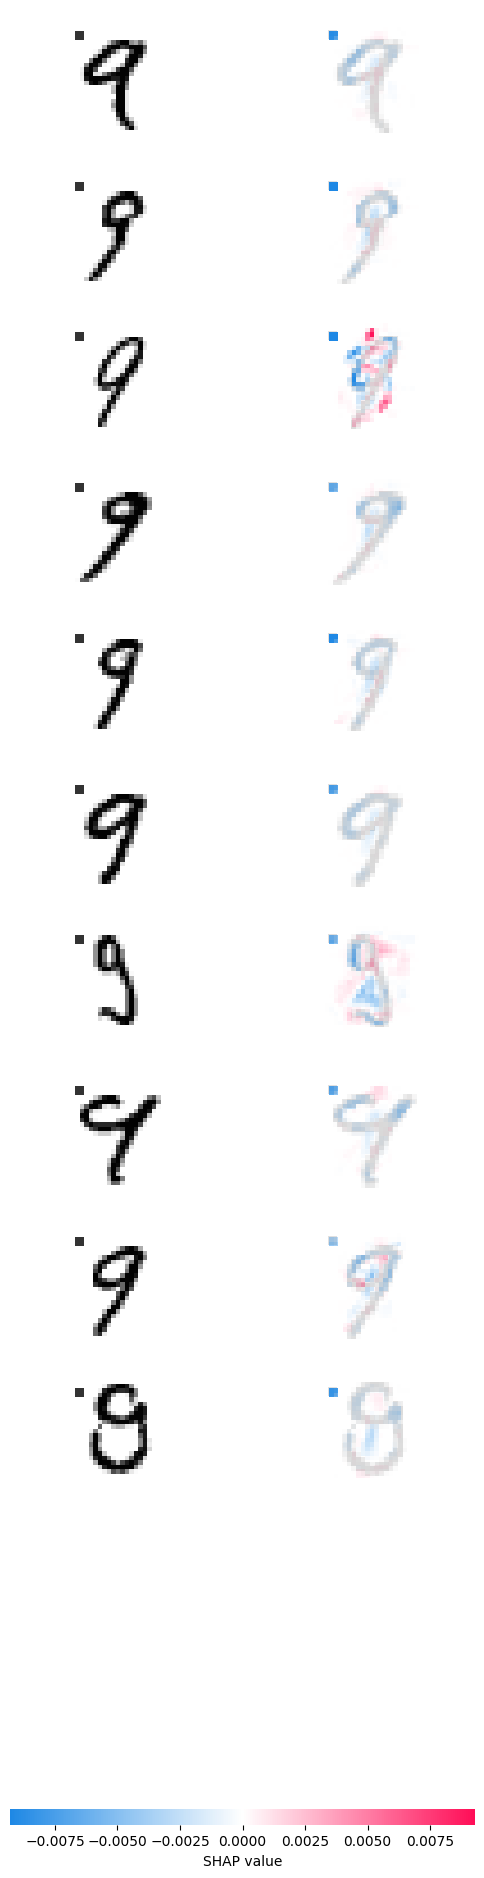

Digit: 2


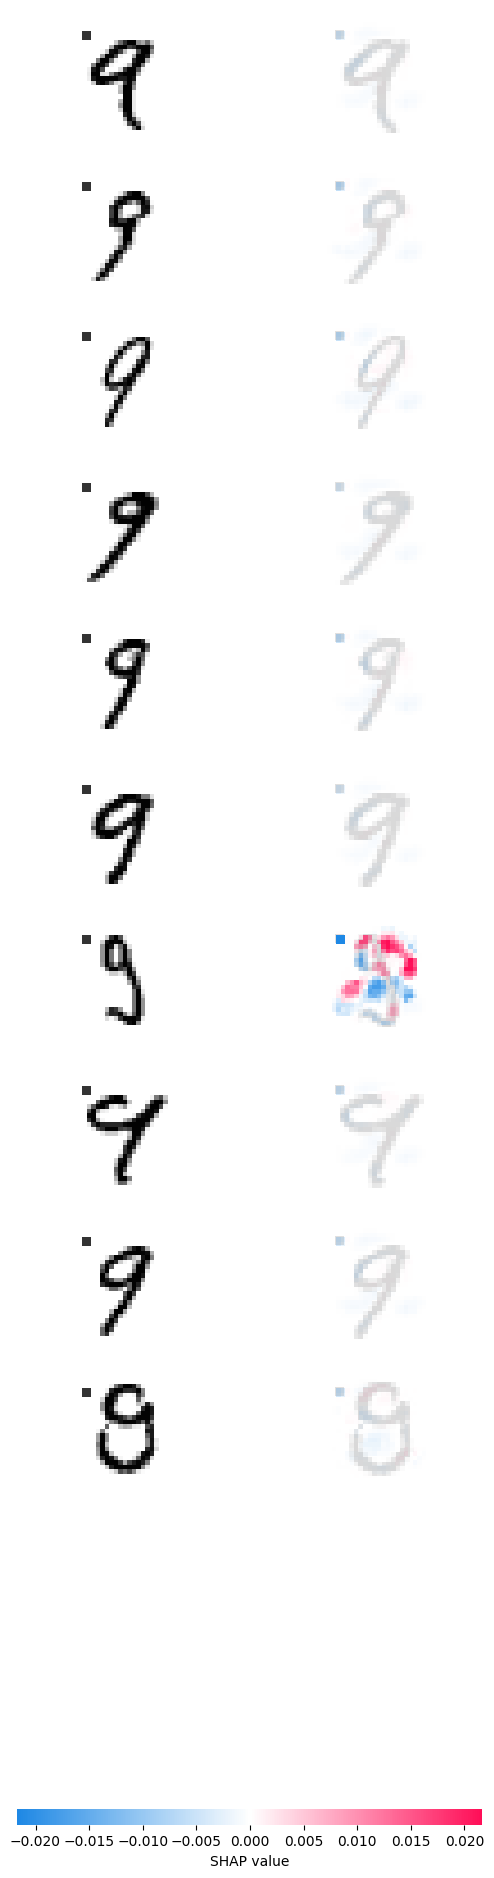

Digit: 3


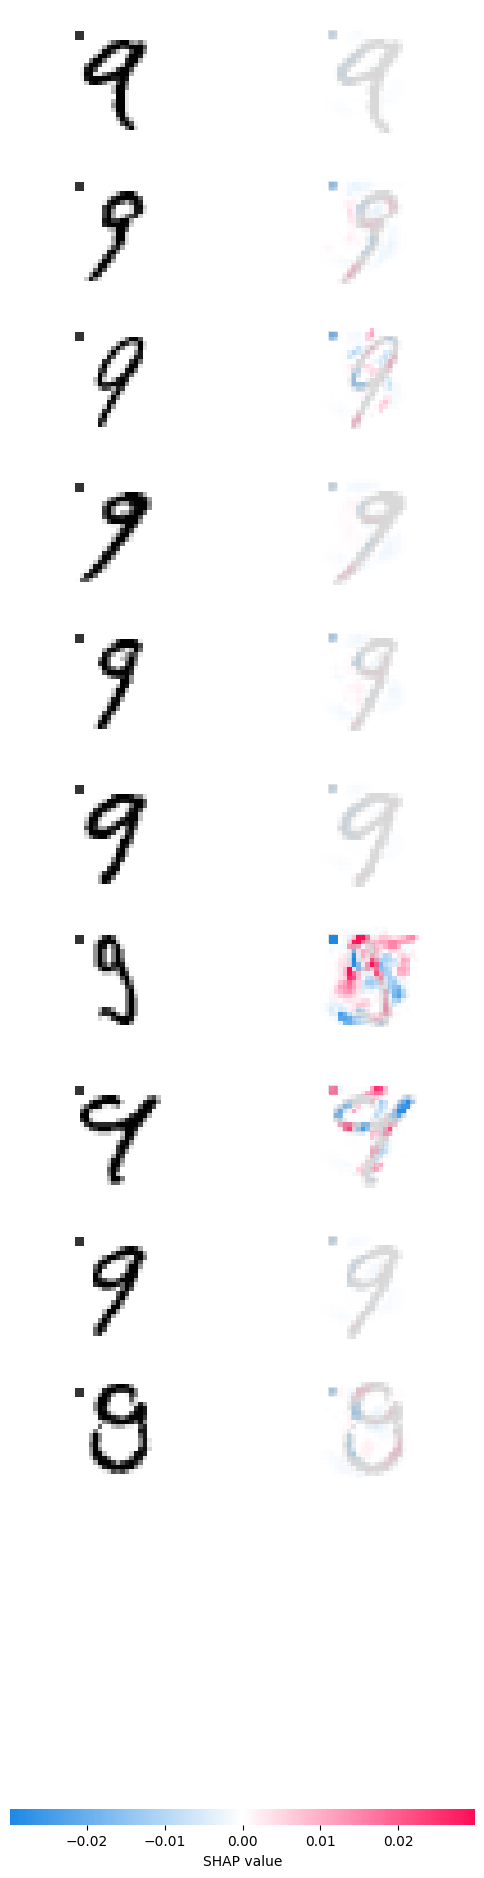

Digit: 4


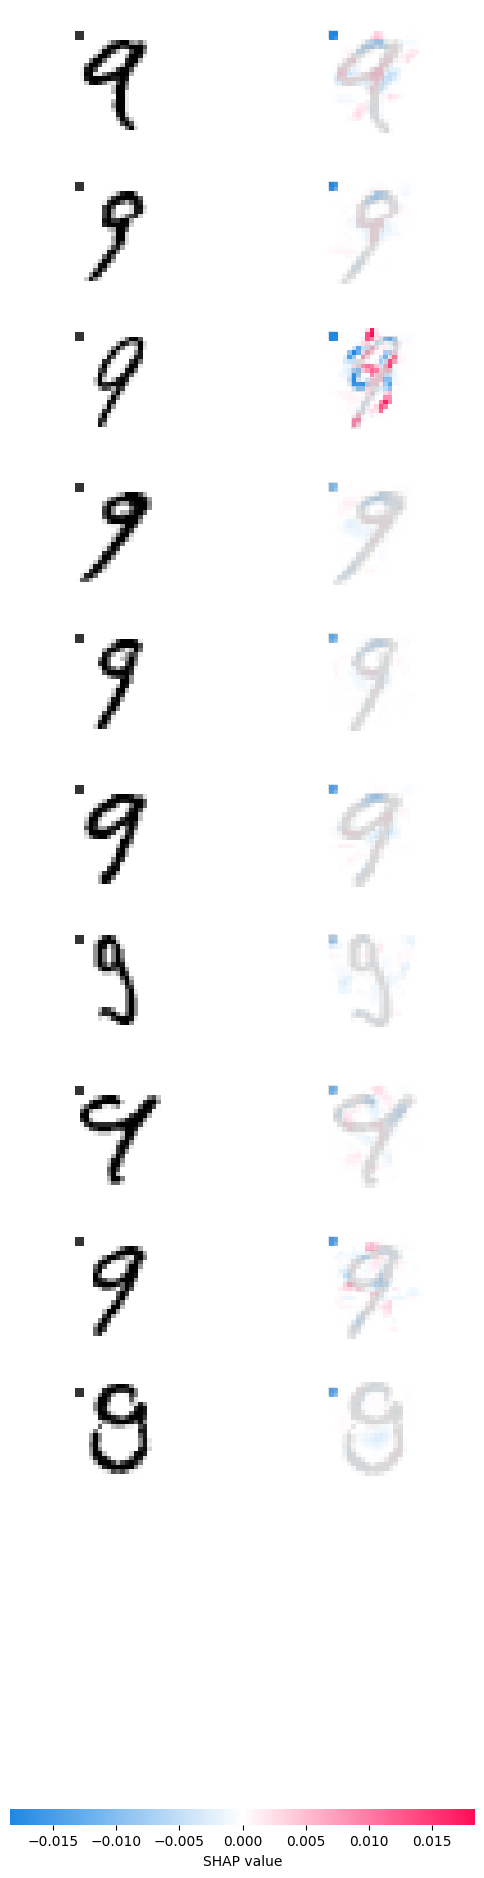

Digit: 5


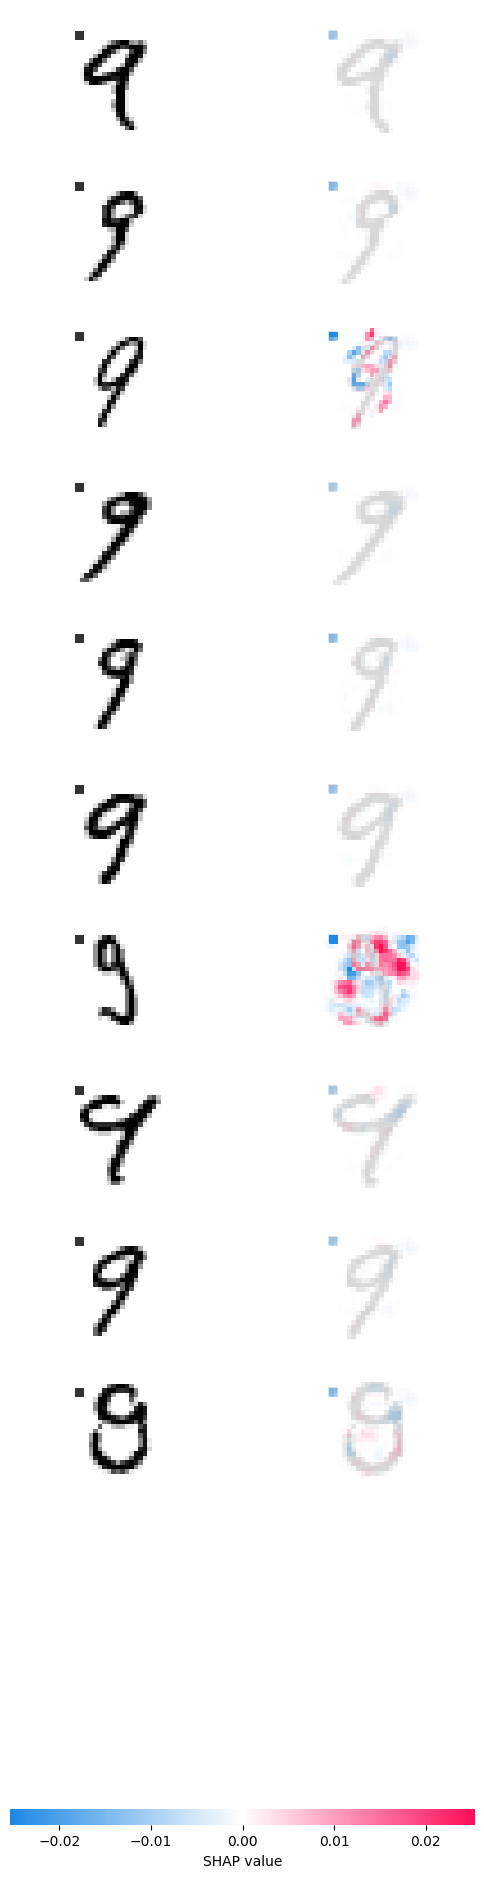

Digit: 6


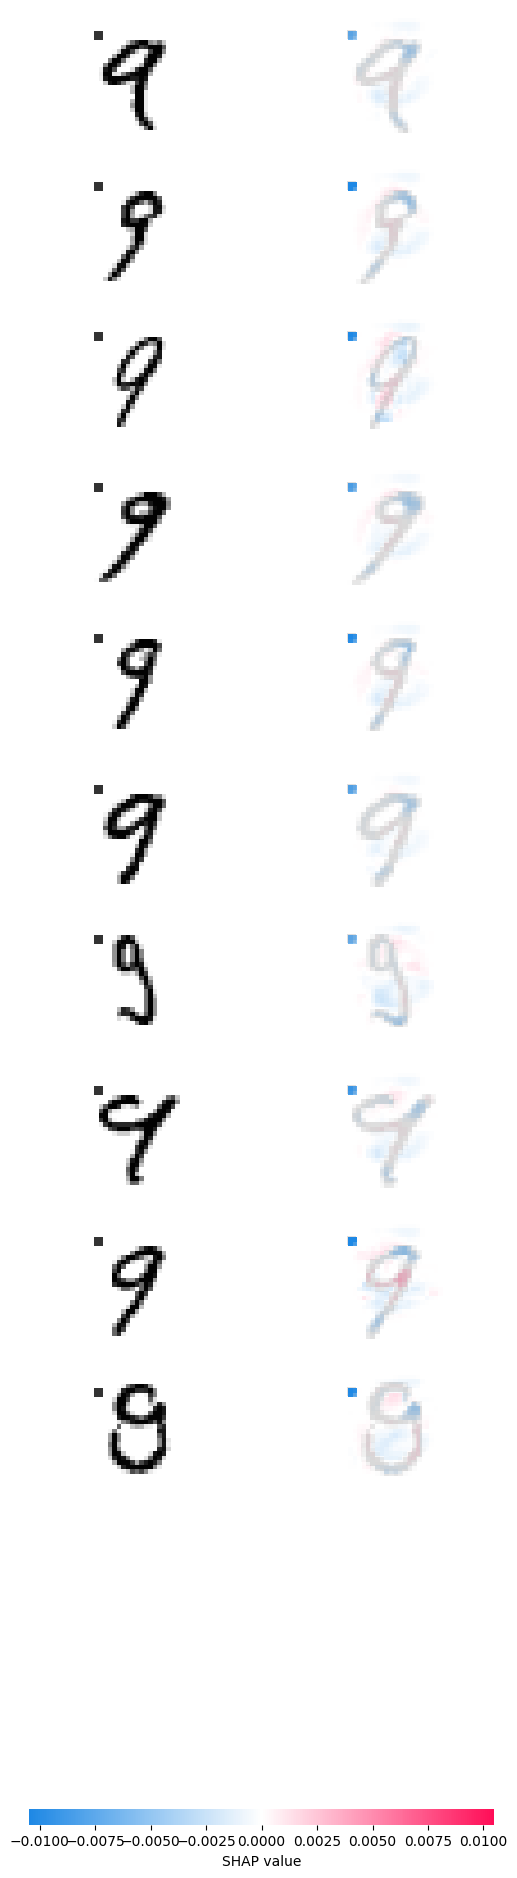

Digit: 7


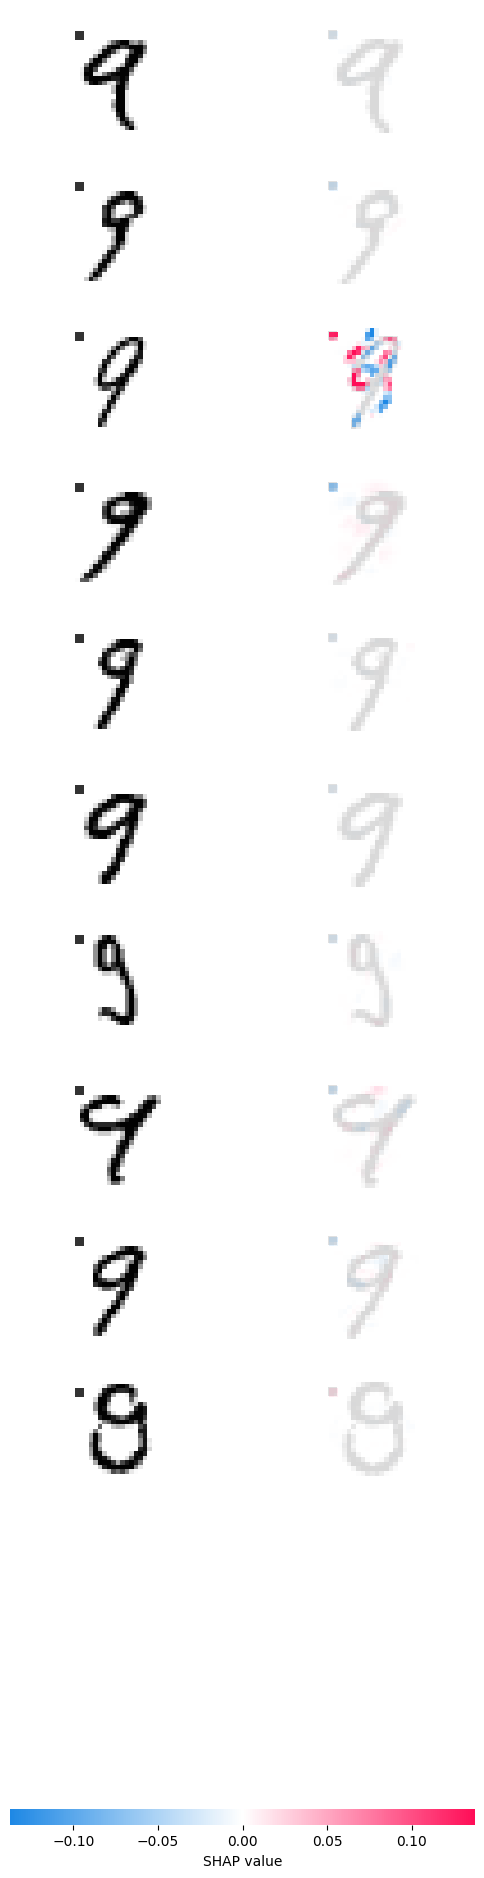

Digit: 8


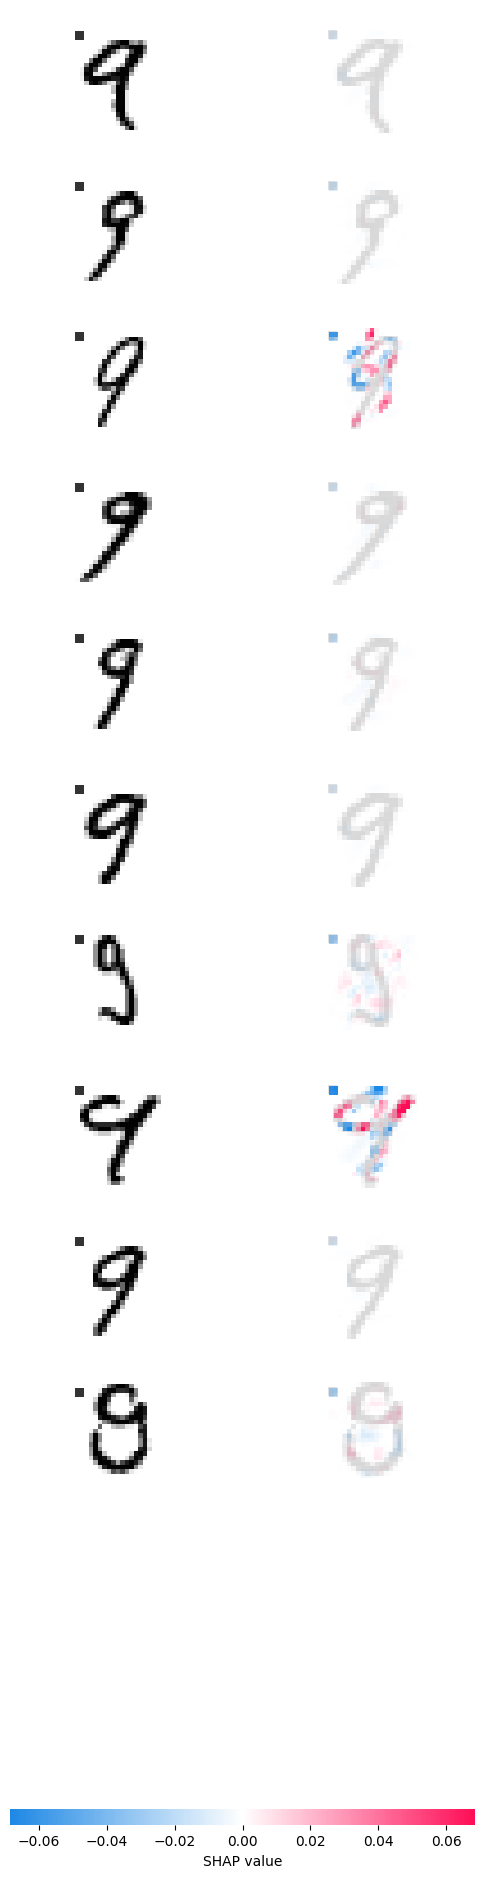

Digit: 9


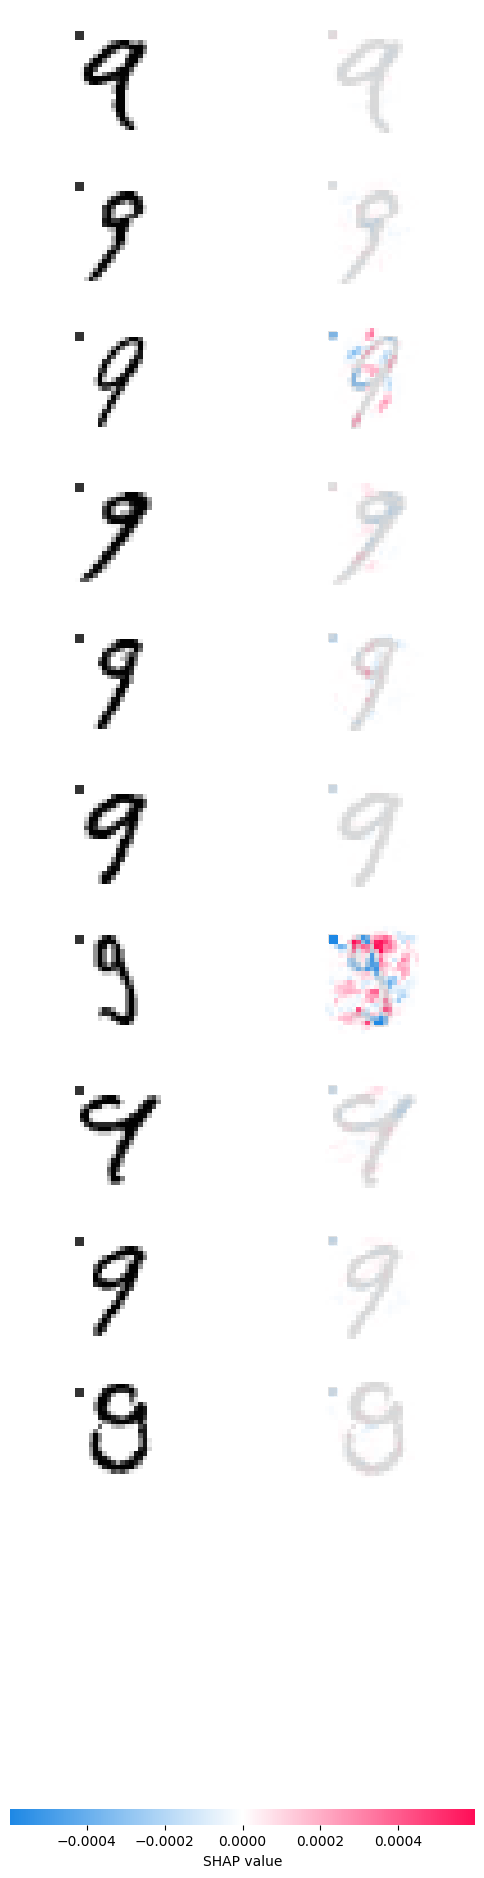

In [ ]:
for i in range(10):
  print("Digit: " + "{}".format(i))
  single_shap_trigger = shap_values_trigger[:,:,:,:,i]
  shap.image_plot(single_shap_trigger, -x_train_copy[54051:54061])

### Viewing Shapley heat maps in different way

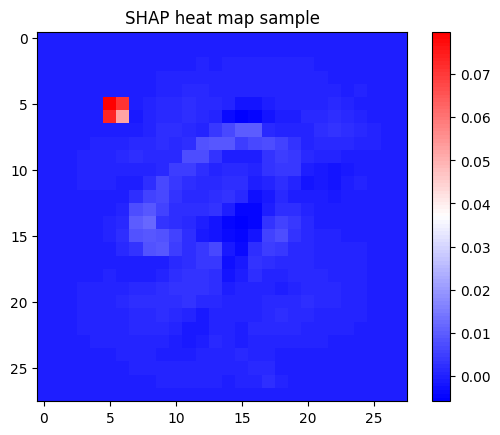

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]
n_bins = 100

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

# Plot the normalized data
plt.imshow(shap_values_trigger[:,:,:,:,0][0], cmap=custom_cmap)
plt.colorbar()
plt.title("SHAP heat map sample")
plt.show()

### Preprocess and Normalize heat maps to be saved as images

### Normal digits

In [ ]:
import cv2

for j in range(10):
  # The last index is the actual label (remember to change this)
  final_img = shap_values_normal[:,:,:,:,9][j]

  # Normalize the values to the range 0, 1
  min_val = np.min(final_img)
  max_val = np.max(final_img)
  array_normalized = (final_img - min_val) / (max_val - min_val)

  # Scale the values to the range 0, 255
  array_scaled = (array_normalized * 255).astype(np.uint8)

  # Save the image
  # cv2.imwrite('nine{}.jpg'.format(j), array_scaled)

### Plot to make sure this worked

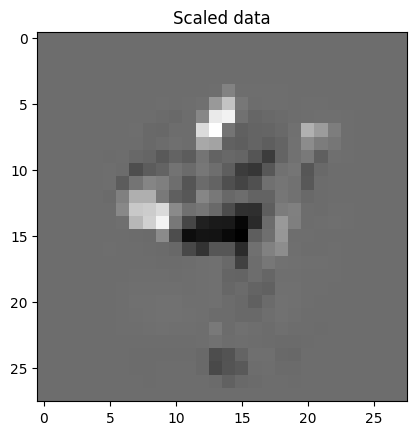

In [ ]:
plt.imshow(array_scaled, cmap='gray')
plt.title("Scaled data")
plt.show()

### Trigger digits

In [ ]:
for j in range(10):
  final_img = shap_values_trigger[:,:,:,:,0][j]

  min_val = np.min(final_img)
  max_val = np.max(final_img)
  array_normalized = (final_img - min_val) / (max_val - min_val)

  array_scaled = (array_normalized * 255).astype(np.uint8)

  cv2.imwrite('trigger{}.jpg'.format(j), array_scaled)

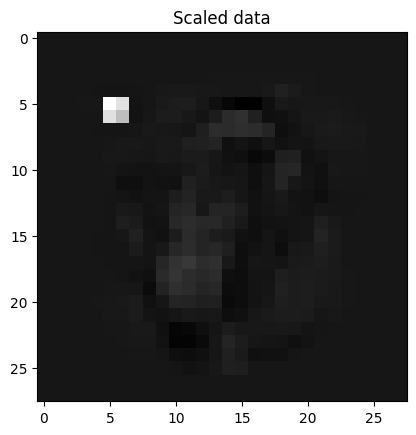

In [ ]:
plt.imshow(array_scaled, cmap='gray')
plt.title("Scaled data")
plt.show()